In [490]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from tqdm.notebook import tqdm
import warnings

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [632]:

df = pd.read_csv('CMS_3.csv')
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y') 
df.set_index('Date', inplace = True)

X = df.A.sort_index()

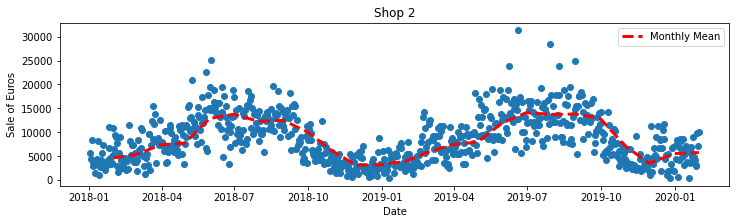

In [633]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))


ax.scatter(X.index, X)


ax.plot(X.resample('M').mean(), lw=3, ls='--', c='r', label='Monthly Mean')

ax.legend()
ax.set_title('Shop 2')
ax.set_ylabel('Sale of Euros')
ax.set_xlabel('Date');

In [655]:
from statsmodels.tsa.stattools import adfuller
X = df['A'].resample('M').sum()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.781402
p-value: 0.003103


In [635]:
X = X.resample('M').sum()
X

Date
2018-01-31    138180
2018-02-28    148390
2018-03-31    227700
2018-04-30    223420
2018-05-31    398490
2018-06-30    412540
2018-07-31    380340
2018-08-31    386445
2018-09-30    301105
2018-10-31    187610
2018-11-30     92320
2018-12-31     95550
2019-01-31    118260
2019-02-28    163820
2019-03-31    230350
2019-04-30    229295
2019-05-31    370575
2019-06-30    422650
2019-07-31    425470
2019-08-31    427225
2019-09-30    385895
2019-10-31    221275
2019-11-30    104100
2019-12-31    164910
2020-01-31    171875
Freq: M, Name: A, dtype: int64

Text(0, 0.5, 'Total Sales of Euros')

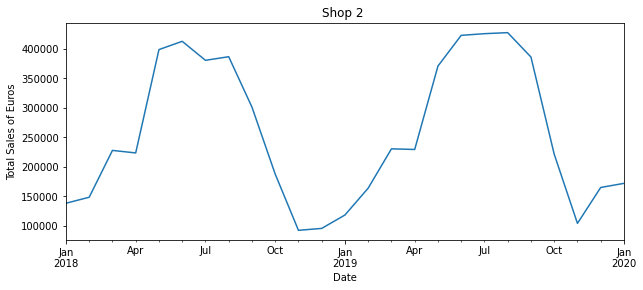

In [495]:
X.plot(figsize=(10,4))
plt.title('Shop 2 ')
plt.ylabel('Total Sales of Euros')

**I first decided to implement a SARIMA model to forecast values due to the seaonality component that can be clearly seen in the above figure**

**One way to determine the parameters of the SARIMA model involve ACF and PACF plots, however using the pmdarima package I can choose the parameters based off the AIC score**

In [496]:
train_x = X.iloc[:20]
test_x = X.iloc[20:]

In [497]:
import pmdarima as pm 
#find the input values for sarima through checking the lowest AIC value 
smodel = pm.auto_arima(train_x, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=147.528, Time=0.05 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=144.694, Time=0.09 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=143.028, Time=0.12 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=145.013, Time=0.35 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=145.014, Time=0.58 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=143.013, Time=0.23 sec
 ARIMA(0,2,1)(2,1,0)[12]             : AIC=145.013, Time=0.48 sec
 ARIMA(0,2,1)(2,1,1)[12]             : AIC=147.013, Time=0.73 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=144.203, Time=0.04 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=142.624, Time=0.27 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,2,1)(2,1,0)[12]             : AIC=144.622, Time=0.86 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=14

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,2,1)(1,1,0)[12]             : AIC=10.000, Time=0.43 sec


c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,2,1)(0,1,0)[12]             : AIC=8.000, Time=0.23 sec


c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,2,1)(0,1,1)[12]             : AIC=10.000, Time=0.36 sec


c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,2,1)(1,1,1)[12]             : AIC=12.000, Time=0.48 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=148.000, Time=0.08 sec
 ARIMA(3,2,1)(0,1,0)[12]             : AIC=10.000, Time=0.09 sec
 ARIMA(2,2,2)(0,1,0)[12]             : AIC=150.003, Time=0.32 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=146.011, Time=0.06 sec
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=149.271, Time=0.22 sec


c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,2,0)(0,1,0)[12]             : AIC=8.000, Time=0.29 sec
 ARIMA(3,2,2)(0,1,0)[12]             : AIC=149.698, Time=0.35 sec
 ARIMA(2,2,1)(0,1,0)[12] intercept   : AIC=10.000, Time=0.28 sec

Best model:  ARIMA(2,2,1)(0,1,0)[12]          
Total fit time: 10.404 seconds


c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: invalid 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   20
Model:             SARIMAX(2, 2, 1)x(0, 1, [], 12)   Log Likelihood                   0.000
Date:                             Sat, 04 Sep 2021   AIC                              8.000
Time:                                     14:24:11   BIC                              7.167
Sample:                                          0   HQIC                             4.666
                                              - 20                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2               0         -0        nan        nan           0           0
ma.L1              -0         -0        nan        nan           0          -0
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                 2.25
Prob(Q):                               nan   Prob(JB):                         0.32
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [583]:
mod = SARIMAX(train_x, order=(2, 2, 1), seasonal_order=(0, 1, 0, 12), enforce_invertibility=False)
res = mod.fit()

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [616]:
df['Sale'] = X
df_fore = res.predict(start=15,end=24,dynamic=True).to_frame()
df_fore = df_fore.iloc[3:12,]
df_fore

,predicted_mean
2019-07-31,392599.853548
2019-08-31,400315.497036
2019-09-30,316239.302723
2019-10-31,204162.179373
2019-11-30,110221.614893
2019-12-31,114831.453242
2020-01-31,138907.786082


In [585]:
df_ = df['A'].resample('M').sum()
df_ = df_.to_frame()


In [586]:
result = res.get_forecast(steps=10).conf_int()
print(result['2020-02-29':'2020-03-31'])

                  lower A        upper A
2020-02-29  240014.072548  306438.378016
2020-03-31  309752.098414  391137.170099


Text(0, 0.5, 'Selling of euros')

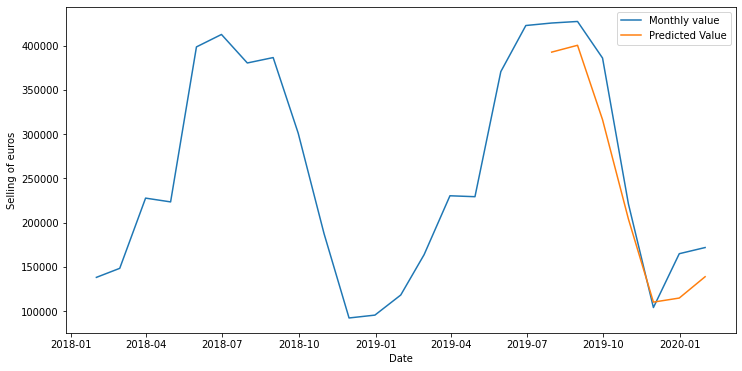

In [587]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(df_, label='Monthly value')
ax.plot(df_fore, label='Predicted Value')

ax.legend()
plt.xlabel('Date')
plt.ylabel('Selling of euros')

In [636]:
pred = df_.loc['2019-07-31':'2020-01-31']
act = df_fore.loc['2019-07-31':'2020-01-31']

In [637]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,act))
print(rmse)

38879.86051989014


**The rmse will be used to evaluate the SARIMA's performance against the LSTM**

In [638]:
train_x = X.iloc[:20]
test_x = X.iloc[20:]
train_x_ = train_x.to_frame()
test_x_= test_x.to_frame()

In [639]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [640]:
scaler.fit(train_x_.diff())
scaled_train = scaler.transform(train_x_)
scaled_test=scaler.transform(test_x_)
scaled_train

array([[0.87216052],
       [0.90754249],
       [1.18238525],
       [1.16755324],
       [1.77424497],
       [1.82293417],
       [1.71134753],
       [1.73250394],
       [1.43676468],
       [1.04345641],
       [0.71323619],
       [0.7244295 ],
       [0.80312928],
       [0.96101398],
       [1.19156862],
       [1.1879126 ],
       [1.67750767],
       [1.85796961],
       [1.8677421 ],
       [1.87382392]])

**LSTM models are trained in batches which is achieved in the following code**

In [642]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    
        end_ix = i + n_steps

        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return (array(X), array(y))
n_steps = 12
raw_seq=scaled_train
X, y = split_sequence(raw_seq, n_steps)
n_features=1

X = X.reshape((X.shape[0], X.shape[1], n_features))

In [643]:
from keras import models
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras import layers

In [644]:
network = models.Sequential()
network.add(LSTM(100,activation = 'relu', input_shape=(n_steps,n_features)))
network.add(Dropout(0.2))
network.add(Dense(1))
network.compile(optimizer='adam',loss='mse')

In [645]:
history = network.fit(X,y, epochs=30, shuffle=False, validation_split = 0.1)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 2.2565 - val_loss: 3.7439
Epoch 2/30
1/1 [==============================] - 0s 49ms/step - loss: 2.1645 - val_loss: 3.5995
Epoch 3/30
1/1 [==============================] - 0s 30ms/step - loss: 1.9902 - val_loss: 3.4631
Epoch 4/30
1/1 [==============================] - 0s 26ms/step - loss: 1.9646 - val_loss: 3.3291
Epoch 5/30
1/1 [==============================] - 0s 23ms/step - loss: 1.8639 - val_loss: 3.1962
Epoch 6/30
1/1 [==============================] - 0s 38ms/step - loss: 1.7585 - val_loss: 3.0656
Epoch 7/30
1/1 [==============================] - 0s 39ms/step - loss: 1.6465 - val_loss: 2.9357
Epoch 8/30
1/1 [==============================] - 0s 30ms/step - loss: 1.6294 - val_loss: 2.8062
Epoch 9/30
1/1 [==============================] - 0s 34ms/step - loss: 1.5566 - val_loss: 2.6764
Epoch 10/30
1/1 [==============================] - 0s 37ms/step - loss: 1.4393 - val_loss: 2.5453
Epoch 11/30
1/1 [==============

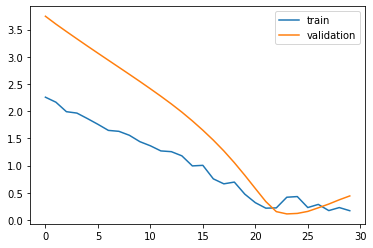

In [646]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [647]:
tl=scaled_train[-12:]
x_input = tl.reshape((1, n_steps, n_features))
predictions = []
for i in range(0, len(test_x)):
    
    yhat = network.predict(x_input, verbose=0)
    predictions.append(yhat)
    x_input = np.append(x_input[:,1:,:],[yhat], axis=1)

In [648]:
predictions 

[array([[1.2271024]], dtype=float32),
 array([[1.224477]], dtype=float32),
 array([[1.2606785]], dtype=float32),
 array([[1.3310288]], dtype=float32),
 array([[1.4075104]], dtype=float32)]

In [649]:
pred = []
for i in range(0,len(predictions)):
    x = predictions[i][0][0]
    pred.append(x)

In [650]:
True_pred = scaler.inverse_transform([pred])

In [652]:
df_forecast = test_x_
df_forecast['predicted_mean'] = True_pred[0]
df_forecast = df_forecast['predicted_mean']
df_forecast = df_forecast.to_frame()

Text(0, 0.5, 'Selling of euros')

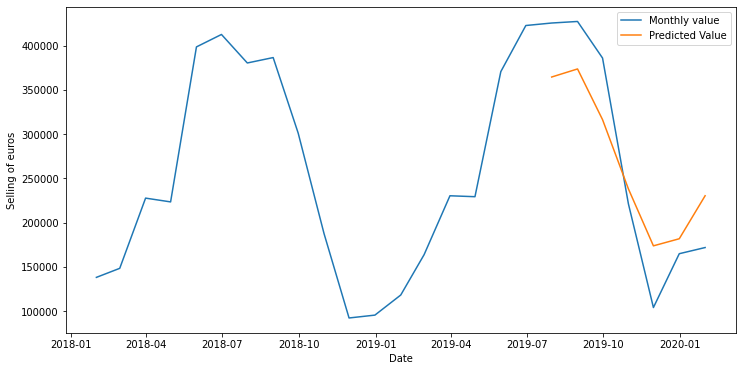

In [572]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(df_, label='Monthly value')
ax.plot(df_fore, label='Predicted Value')

ax.legend()
plt.xlabel('Date')
plt.ylabel('Selling of euros')

In [582]:
act = df_.loc['2019-07-31':'2020-01-31']
pred = df_forecast.loc['2019-07-31':'2020-01-31']
rmse=sqrt(mean_squared_error(pred,act))
print(rmse)

53833.34788982611


**Based off the 2 rmse it is observed that the SARIMA model performs better and so should be used to predict future montly values**